In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#Loading the Dataset
df = pd.read_csv("C:/Users/HP/Downloads/archive (1) (1)/COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code_-_Historical.csv")
df.head(10)

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60622,31,07/26/2020,08/01/2020,28.0,877.0,53.0,1661.2,1329.0,13148,...,24904.8,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-31,POINT (-87.681818 41.902762)
1,60622,32,08/02/2020,08/08/2020,34.0,911.0,64.0,1725.6,1405.0,14553,...,27566.2,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-32,POINT (-87.681818 41.902762)
2,60622,33,08/09/2020,08/15/2020,41.0,952.0,78.0,1803.3,1542.0,16095,...,30487.0,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-33,POINT (-87.681818 41.902762)
3,60622,34,08/16/2020,08/22/2020,42.0,994.0,80.0,1882.8,1674.0,17769,...,33657.9,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-34,POINT (-87.681818 41.902762)
4,60622,35,08/23/2020,08/29/2020,45.0,1039.0,85.0,1968.1,1540.0,19309,...,36574.9,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-35,POINT (-87.681818 41.902762)
5,60622,36,08/30/2020,09/05/2020,29.0,1068.0,55.0,2023.0,1547.0,20856,...,39505.2,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-36,POINT (-87.681818 41.902762)
6,60622,37,09/06/2020,09/12/2020,46.0,1114.0,87.0,2110.1,1400.0,22256,...,42157.1,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-37,POINT (-87.681818 41.902762)
7,60622,39,09/20/2020,09/26/2020,63.0,1217.0,119.0,2305.2,1844.0,25763,...,48800.0,0.0,0.0,0,56,0.0,106.1,52793,60622-2020-39,POINT (-87.681818 41.902762)
8,60622,40,09/27/2020,10/03/2020,45.0,1262.0,85.0,2390.5,1705.0,27468,...,52029.6,0.0,0.0,0,56,0.0,106.1,52793,60622-2020-40,POINT (-87.681818 41.902762)
9,60622,43,10/18/2020,10/24/2020,166.0,1617.0,314.0,3062.9,2642.0,34626,...,65588.2,0.1,0.0,0,56,0.0,106.1,52793,60622-2020-43,POINT (-87.681818 41.902762)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ZIP Code                              13132 non-null  object 
 1   Week Number                           13132 non-null  int64  
 2   Week Start                            13132 non-null  object 
 3   Week End                              13132 non-null  object 
 4   Cases - Weekly                        12909 non-null  float64
 5   Cases - Cumulative                    12909 non-null  float64
 6   Case Rate - Weekly                    12909 non-null  float64
 7   Case Rate - Cumulative                12909 non-null  float64
 8   Tests - Weekly                        12740 non-null  float64
 9   Tests - Cumulative                    13132 non-null  int64  
 10  Test Rate - Weekly                    13132 non-null  int64  
 11  Test Rate - Cum

In [7]:
df.shape

(13132, 21)

In [9]:
df.describe()

,Week Number,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population
count,13132.000000,12909.000000,12909.000000,12909.000000,12909.000000,12740.000000,13132.000000,13132.000000,1.313200e+04,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000
mean,26.170119,63.458440,8344.924161,136.947401,17734.813309,1225.955024,129983.026652,2677.341989,2.957631e+05,0.056298,0.074147,0.636689,105.623896,1.218299,199.797525,46258.380064
std,14.871736,121.313518,7516.565007,245.224599,11955.509645,1400.608932,135184.120574,3240.396176,2.931501e+05,0.078874,0.064195,1.634849,91.039144,3.309388,138.398733,26835.033756
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,11.000000,1989.000000,32.000000,7127.600000,158.000000,10100.500000,369.000000,2.742940e+04,0.000000,0.000000,0.000000,19.000000,0.000000,81.800000,28804.000000
50%,25.000000,30.000000,6503.000000,76.000000,19382.600000,835.500000,86097.000000,1946.000000,2.331007e+05,0.000000,0.100000,0.000000,90.000000,0.000000,192.900000,46024.000000
75%,39.000000,70.000000,12839.000000,150.000000,27597.600000,1807.250000,223838.750000,3795.250000,4.949480e+05,0.100000,0.100000,1.000000,168.000000,1.200000,309.000000,68096.000000
max,53.000000,2212.000000,36570.000000,6266.000000,64450.100000,13173.000000,538868.000000,75755.000000,2.037212e+06,1.000000,0.500000,25.000000,365.000000,80.400000,540.600000,111850.000000


In [11]:
df.dtypes

ZIP Code                                 object
Week Number                               int64
Week Start                               object
Week End                                 object
Cases - Weekly                          float64
Cases - Cumulative                      float64
Case Rate - Weekly                      float64
Case Rate - Cumulative                  float64
Tests - Weekly                          float64
Tests - Cumulative                        int64
Test Rate - Weekly                        int64
Test Rate - Cumulative                  float64
Percent Tested Positive - Weekly        float64
Percent Tested Positive - Cumulative    float64
Deaths - Weekly                           int64
Deaths - Cumulative                       int64
Death Rate - Weekly                     float64
Death Rate - Cumulative                 float64
Population                                int64
Row ID                                   object
ZIP Code Location                       

In [13]:
df = df.replace('Unknown', np.nan)

In [15]:
df.isnull().sum()

ZIP Code                                211
Week Number                               0
Week Start                                0
Week End                                  0
Cases - Weekly                          223
Cases - Cumulative                      223
Case Rate - Weekly                      223
Case Rate - Cumulative                  223
Tests - Weekly                          392
Tests - Cumulative                        0
Test Rate - Weekly                        0
Test Rate - Cumulative                    0
Percent Tested Positive - Weekly          0
Percent Tested Positive - Cumulative      0
Deaths - Weekly                           0
Deaths - Cumulative                       0
Death Rate - Weekly                       0
Death Rate - Cumulative                   0
Population                                0
Row ID                                    0
ZIP Code Location                       211
dtype: int64

In [17]:
duplicates=df.duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicates: ", num_duplicates)

Number of duplicates:  0


In [19]:
df.drop(columns=['Row ID', 'ZIP Code Location'], inplace=True)

In [21]:
#Data Cleaning and Preprocessing
df['ZIP Code'].fillna(df['ZIP Code'].mode()[0], inplace=True)
df['Cases - Weekly'].fillna(df['Cases - Weekly'].mean(), inplace=True)
df['Cases - Cumulative'].fillna(df['Cases - Cumulative'].mean(), inplace=True)
df['Case Rate - Weekly'].fillna(df['Case Rate - Weekly'].mean(), inplace=True)
df['Case Rate - Cumulative'].fillna(df['Case Rate - Cumulative'].mean(), inplace=True)
df['Tests - Weekly'].fillna(df['Tests - Weekly'].mean(), inplace=True)
df.isnull().sum()

ZIP Code                                0
Week Number                             0
Week Start                              0
Week End                                0
Cases - Weekly                          0
Cases - Cumulative                      0
Case Rate - Weekly                      0
Case Rate - Cumulative                  0
Tests - Weekly                          0
Tests - Cumulative                      0
Test Rate - Weekly                      0
Test Rate - Cumulative                  0
Percent Tested Positive - Weekly        0
Percent Tested Positive - Cumulative    0
Deaths - Weekly                         0
Deaths - Cumulative                     0
Death Rate - Weekly                     0
Death Rate - Cumulative                 0
Population                              0
dtype: int64

In [23]:
df['ZIP Code'] = df['ZIP Code'].astype(str)
# Convert date columns to datetime format
df['Week Start'] = pd.to_datetime(df['Week Start'])
df['Week End'] = pd.to_datetime(df['Week End'])

In [25]:
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns_1 = df.select_dtypes(include='object').columns
categorical_columns_2 = df.select_dtypes(exclude=np.number).columns
print(numerical_columns)
print("\n")
print(categorical_columns_1)
print("\n")
print(categorical_columns_2)

Index(['Week Number', 'Cases - Weekly', 'Cases - Cumulative',
       'Case Rate - Weekly', 'Case Rate - Cumulative', 'Tests - Weekly',
       'Tests - Cumulative', 'Test Rate - Weekly', 'Test Rate - Cumulative',
       'Percent Tested Positive - Weekly',
       'Percent Tested Positive - Cumulative', 'Deaths - Weekly',
       'Deaths - Cumulative', 'Death Rate - Weekly', 'Death Rate - Cumulative',
       'Population'],
      dtype='object')


Index(['ZIP Code'], dtype='object')


Index(['ZIP Code', 'Week Start', 'Week End'], dtype='object')


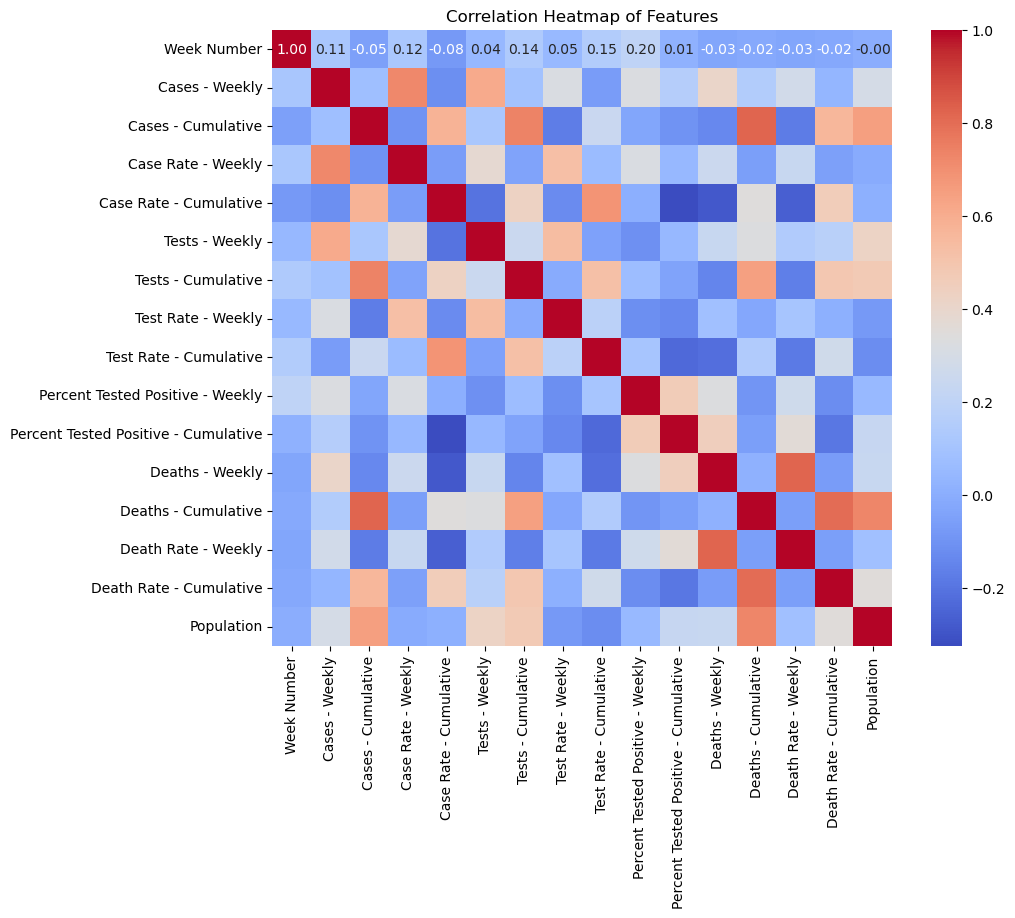

In [27]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

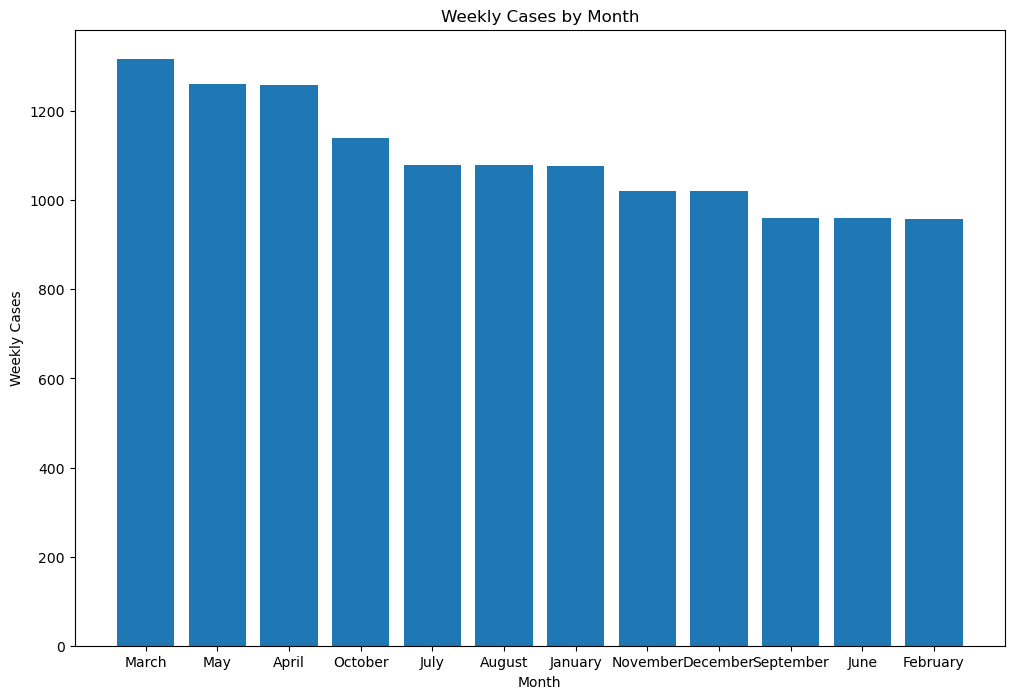

In [29]:
#Get the name of month
df_new = df.copy()
df_new['Week_Start_Month'] = df['Week Start'].dt.month_name()
df_new['Week Start Year'] = df['Week Start'].dt.year

#Calculate the count
Week_Start = df_new['Week_Start_Month'].value_counts()
plt.figure(figsize=(12, 8))
plt.bar(Week_Start.index, Week_Start.values)
plt.title('Weekly Cases by Month')
plt.xlabel('Month')
plt.ylabel('Weekly Cases')
plt.show()

df.drop(columns=['Week Start', 'Week End'], inplace=True) 

In [31]:
df = pd.get_dummies(df, columns=['ZIP Code'], drop_first=True)

In [33]:
X = df.drop(columns=["Cases - Weekly"]) 
y = df["Cases - Weekly"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [37]:
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R² Score): {r2*100:.4f}%")

Mean Absolute Error (MAE): 4.1203
Mean Squared Error (MSE): 711.8736
R-squared (R² Score): 95.8450%


In [41]:
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print(f"Optimized MSE: {mse_best:.4f}")
print(f"Optimized MAE: {mae_best:.4f}")
print(f"R-squared (R² Score): {r2_best*100:.2f}%")

Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized MSE: 674.2795
Optimized MAE: 4.1368
R-squared (R² Score): 96.06%


In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

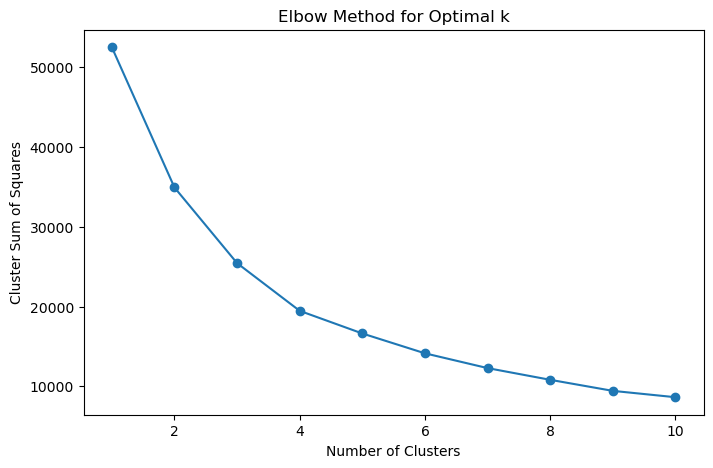

In [45]:
features = ['Cases - Weekly', 'Case Rate - Weekly', 'Tests - Weekly', 'Percent Tested Positive - Weekly']
df_new = df_new[['ZIP Code'] + features]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new[features])

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_) 
    
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Sum of Squares")
plt.title("Elbow Method for Optimal k")
plt.show()

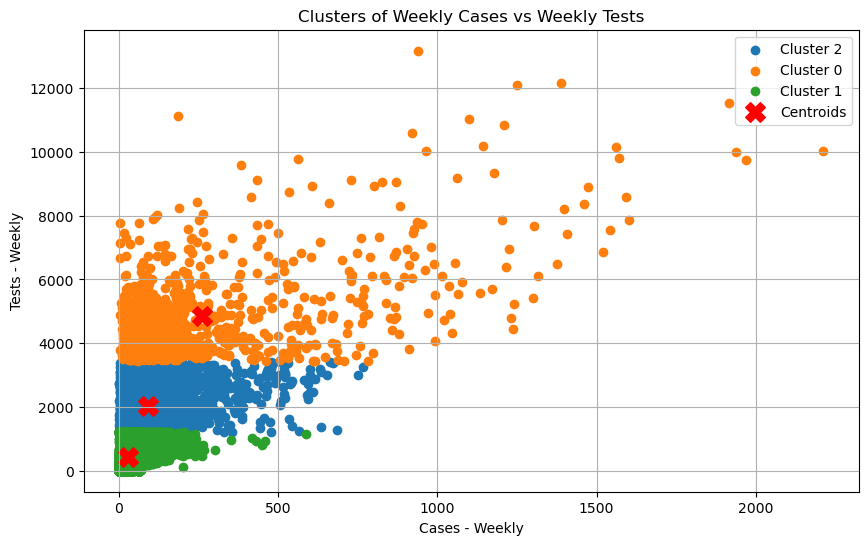

In [47]:
X = df_new[['Cases - Weekly', 'Tests - Weekly']]

kmeans = KMeans(n_clusters=3, random_state=42)

df_new['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
for cluster in df_new['Cluster'].unique():
    cluster_data = df_new[df_new['Cluster'] == cluster]
    plt.scatter(cluster_data['Cases - Weekly'], cluster_data['Tests - Weekly'], label=f'Cluster {cluster}')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='red', marker='X', label='Centroids')

plt.title('Clusters of Weekly Cases vs Weekly Tests')
plt.xlabel('Cases - Weekly')
plt.ylabel('Tests - Weekly')
plt.legend()
plt.grid(True)
plt.show()

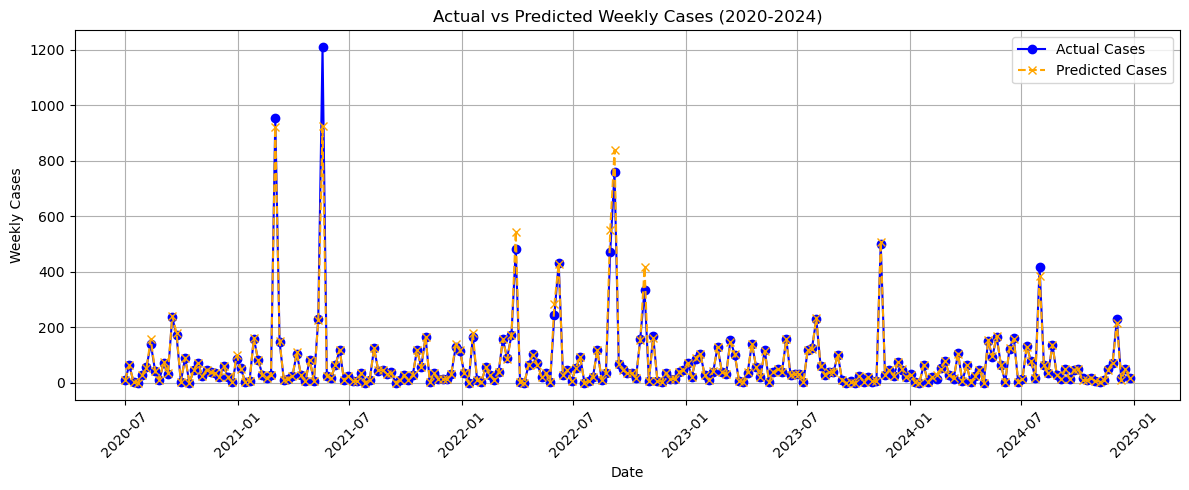

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

start_date = datetime.datetime(2020, 1, 1)
dates = [start_date + datetime.timedelta(weeks=i) for i in range(len(y_test))]

df = pd.DataFrame({
    "Week Start": dates,
    "Actual": y_test,
    "Predicted": y_pred_best
})
df = df[(df["Week Start"] >= '2020-07-01') & (df["Week Start"] <= '2024-12-31')]

plt.figure(figsize=(12, 5))
plt.plot(df['Week Start'], df['Actual'], 'o-', color='blue', label='Actual Cases')
plt.plot(df['Week Start'], df['Predicted'], 'x--', color='orange', label='Predicted Cases')

plt.title("Actual vs Predicted Weekly Cases (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Weekly Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

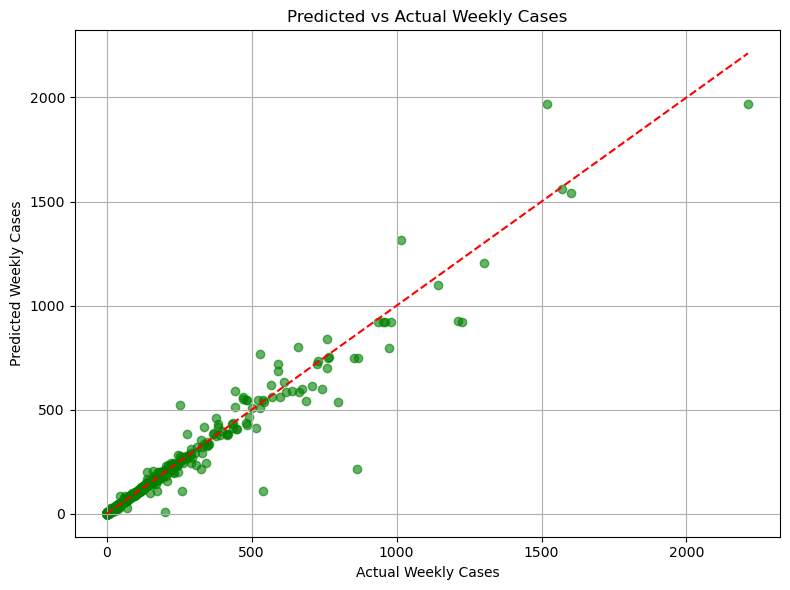

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.title("Predicted vs Actual Weekly Cases")
plt.xlabel("Actual Weekly Cases")
plt.ylabel("Predicted Weekly Cases")
plt.grid(True)
plt.tight_layout()
plt.show()